# Výjimky (exceptions)

Chyby můžeme rozdělit do dovu skupin
- syntaktické chyby
- logické chyby (výjimky)

In [2]:
# 1/0
slovnik = {
    "key1" : 0,
    "key2" : 1
}
slovnik["key3"]

KeyError: 'key3'

In [4]:
try:
    print("pred")
    1/0
    print("po")
except:
    print("oh nein")

pred
oh nein


In [ ]:
try:
    1/0
except:
    print("chyba")
finally:
    print("cleanup")

In [ ]:
try:
    print("zapis do souboru")
    # chyba
    print("odeslani souboru nekam")
except:
    print("chyba")
    print("log: soubor neodeslan")
finally:
    print("mazani souboru")

In [13]:
slovnik = {
    "key1" : 0,
    "key2" : 1
}

try:
    num = slovnik["key2"]
    1 / num
    " " + 1.0
except KeyError:
    print("key error")
except ZeroDivisionError:
    print("deleni nulou")
except:
    print("jina chyba")

jina chyba


In [16]:
try:
    "" + 1.0
    1/0
except ArithmeticError as e:
    print(e, type(e))

TypeError: can only concatenate str (not "float") to str

In [23]:
def function(a):
    if (type(a) != float):
        raise TypeError("chyba")
    print(a)
    
try:
    function(1)
except Exception as e:
    print(e)

chyba


In [17]:
type(1.0)

float

## Nahodna cisla

In [27]:
# linear congruential generator
# x_n = (a * x_(n-1) + c) % m

a = 5
c = 0
m = 256
x0 = 3 # seed
x = x0

def randint():
    global x
    x = (a * x + c) % m
    return x

lst = [randint() for i in range(20)]
print(lst)

[15, 75, 119, 83, 159, 27, 135, 163, 47, 235, 151, 243, 191, 187, 167, 67, 79, 139, 183, 147]


In [42]:
import random as r

r.seed(3) # pokud nezadam seed, python automaticky bere timestamp
lst = [r.randint(0, 10) for i in range(20)]
print(lst)

[3, 9, 8, 2, 5, 9, 7, 10, 9, 1, 9, 0, 7, 4, 8, 3, 3, 7, 8, 8]


In [55]:
import random as r

state = r.getstate()
lst = [r.randint(0, 10) for i in range(20)]

r.setstate(state)
lst2 = [r.randint(0, 10) for i in range(20)]
print(lst)
print(lst2)

[1, 7, 0, 1, 8, 8, 7, 5, 2, 5, 1, 5, 6, 10, 6, 9, 4, 5, 4, 3]
[1, 7, 0, 1, 8, 8, 7, 5, 2, 5, 1, 5, 6, 10, 6, 9, 4, 5, 4, 3]


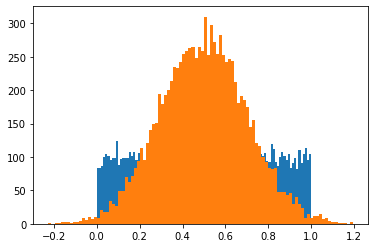

In [63]:
import random as r
import matplotlib.pyplot as plt

N = 10000
n_bins = 100
plt.hist([r.uniform(0, 1.0) for i in range(N)], bins = n_bins)
plt.hist([r.gauss(0.5, 0.2) for i in range(N)], bins = n_bins)
plt.show()

## Context (scope)

In [71]:
x = 1

def do():
    global x
    x = 2
    print(x)
    
do()
print(x)

2
2


In [76]:
# nested funcitons
k = 1
def do():
    l = 1
    
    def change_k():
        global k
        k += 1
        
    def change_l():
        nonlocal l
        l += 1
    
    print(k, l)
    change_k()
    print(k, l)
    change_l()
    print(k, l)
    
do()

1 1
2 1
2 2


In [84]:
def do(f, x): # zjednodusene map
    return f(x)

def program():
    a = 1
    b = 2
    
    def fun(x):
        nonlocal a
        a = x + a + b
        return a * x +b
    
    print(do(fun, 2))
    
program()

12


## numpy

In [89]:
import numpy as np # pip3 install numpy

a = [1] * 10
b = [[1, 1]] *2
print(a, b)

npa = np.array(a)
npb = np.array(b)
print(npa * 2)
print(npb)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [[1, 1], [1, 1]]
[2 2 2 2 2 2 2 2 2 2]
[[1 1]
 [1 1]]


In [94]:
# np.zeros, np.ones, np.empty, np.full
a = np.ones((2,2), dtype = float)
b = np.full((5,), 10)
print(b)

[10 10 10 10 10]


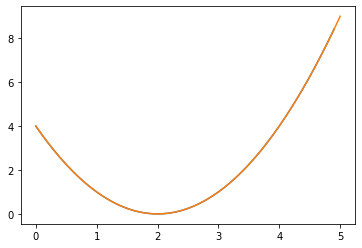

In [99]:
import numpy as np
import matplotlib.pyplot as plt

x = [(0.0 + i * 0.1) for i in range(50)]
y = [(z-2.)**2 for z in x]

xs = np.linspace(0, 5.0, 50) # linspace(start, stop, N)
ys = (xs - 2.)**2
plt.plot(x, y)
plt.plot(xs, ys)

In [110]:
from math import sqrt
import numpy as np

def op(x):
    return sqrt(x) + 1
    
def np_op(x):
    return np.sqrt(x) + 1

N = 10001
x = [(0.0 + i *0.01) for i in range(N)]
%timeit y = [op(i) for i in x]

xs = np.linspace(0., 1., N)
%timeit ys = np_op(xs)

1.14 ms ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.6 µs ± 86.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [108]:
vec_op = np.vectorize(op)
%timeit ys = vec_op(x)

2.53 ms ± 57.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
